# Lab4 
## Структури для роботи з великими обсягами даних в Python
 **Мета**: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit) <br>
**Основні поняття**: numpy масиви, кортежі, списки, фрейми,профілювання.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from numpy.lib.recfunctions import structured_to_unstructured
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Таймер для підрахунку часу роботи функції

In [2]:
def timer(function, number=1):
    execution_time = timeit.timeit(function, number=number)
    print(f"Execution time: {execution_time:.6f} seconds")

## Завдання другого рівня
Виконати всі завдання, використовуючи як numpy array, так і
dataframe
1. Поборотися із зниклими даними. Для цього в допомогу вам Медіум
(https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).
2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).
3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.
5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.
6. Провести One Hot Encoding категоріального string атрибуту.
7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

Додаткове завдання:
8. Поділити випадковим чином датасет на дві рівні частини. Навчити 3
регресійні моделі на основі не менше одного атрибуту відновлювати
інший. Навчання має відбуватися на основі першого датасету
(https://scikit-learn.org/stable/modules/linear_model.html), візуалізувати
моделі та на основі середньої квадратичної помилки (https://scikitlearn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) вибрати найкращу.

## Reading with pandas

In [3]:
data = 'garments_worker_productivity.csv'

### Understanding atributes<br>
01	date			:	Date in MM-DD-YYYY <br>
02	day			:	Day of the Week<br>
03	quarter			:	A portion of the month. A month was divided into four quarters<br>
04	department		:	Associated department with the instance<br>
05	team_no			:	Associated team number with the instance<br>
06	no_of_workers		:	Number of workers in each team<br>
07	no_of_style_change	:	Number of changes in the style of a particular product<br>
08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.<br>
09	smv			:	Standard Minute Value, it is the allocated time for a task<br>
10	wip			:	Work in progress. Includes the number of unfinished items for products<br>
11	over_time		:	Represents the amount of overtime by each team in minutes<br>
12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
13	idle_time		:	The amount of time when the production was interrupted due to several reasons<br>
14	idle_men		:	The number of workers who were idle due to production interruption<br>
15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>

In [4]:
df = pd.read_csv(data,header=0, sep=',')

In [5]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## Cleaning with pandas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df['team'] = df['team'].astype(object)
df['no_of_style_change'] = df['no_of_style_change'].astype(object)
df['no_of_workers'] = df['no_of_workers'].astype(object)
df['over_time'] = df['over_time'].astype(float)
df['incentive'] = df['incentive'].astype(float)
df['idle_men'] = df['idle_men'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   object 
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   object 
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Cleaning column 'department'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   object 
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [10]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [11]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [12]:
replace_matches_in_column(df=df, column='department', string_to_match="finishing")

All done!


In [13]:
df["department"].unique()

array(['sweing', 'finishing'], dtype=object)

### Cleaning NaN values

In [14]:
df.isnull().values.any()

True

In [15]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [16]:
filtered_df_1 = df[df['wip'].notnull()]
filtered_df_1

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720.0,38.0,0.0,0.0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080.0,45.0,0.0,0.0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960.0,30.0,0.0,0.0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840.0,30.0,0.0,0.0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560.0,40.0,0.0,0.0,1,38.0,0.700246


In [17]:
filtered_df_2 = df[df['wip'].isnull()]
filtered_df_2

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960.0,0.0,0.0,0.0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960.0,0.0,0.0,0.0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160.0,0.0,0.0,0.0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960.0,0.0,0.0,0.0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960.0,0.0,0.0,0.0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960.0,0.0,0.0,0.0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800.0,0.0,0.0,0.0,0,15.0,0.505889


In [18]:
filtered_df_1["department"].unique()

array(['sweing'], dtype=object)

In [19]:
filtered_df_2["department"].unique()

array(['finishing'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   object 
 14  actual_productivity    1197 non-null   float64
dtypes: f

**wip: Work in progress. Includes the number of unfinished items for products** <br>
So we can assume that NaN in column "wip" is set only for department "finishing" and it means that we can change it to 0 because it displays that there is no number of unfinished items for products when it goes to department finishing

In [21]:
df.fillna(0, inplace=True)

## Reading with numpy

In [22]:
def f1_reading_np():
    arr = df.to_numpy()
    return arr
arr = f1_reading_np()
arr

array([['1/1/2015', 'Quarter1', 'sweing', ..., 0, 59.0, 0.940725424],
       ['1/1/2015', 'Quarter1', 'finishing', ..., 0, 8.0, 0.8865],
       ['1/1/2015', 'Quarter1', 'sweing', ..., 0, 30.5, 0.800570492],
       ...,
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, 8.0, 0.625625],
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, 15.0, 0.505888889],
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, 6.0, 0.394722222]],
      dtype=object)

In [23]:
arr[:,7]

array([1108.0, 0.0, 968.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [24]:
def f1_reading_np_tuples():    
    columns_list = df.columns.to_list()
    dtypes = [df[column].dtype for column in columns_list]

    arr_1 = np.array([tuple(row) for row in arr], dtype=list(zip(columns_list, dtypes)))
    return arr_1
arr_tuples = f1_reading_np_tuples()
arr_tuples

array([('1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8, 0.8 , 26.16, 1108., 7080., 98., 0., 0., 0, 59.0, 0.94072542),
       ('1/1/2015', 'Quarter1', 'finishing', 'Thursday', 1, 0.75,  3.94,    0.,  960.,  0., 0., 0., 0, 8.0, 0.8865    ),
       ('1/1/2015', 'Quarter1', 'sweing', 'Thursday', 11, 0.8 , 11.41,  968., 3660., 50., 0., 0., 0, 30.5, 0.80057049),
       ...,
       ('3/11/2015', 'Quarter2', 'finishing', 'Wednesday', 7, 0.65,  3.9 ,    0.,  960.,  0., 0., 0., 0, 8.0, 0.625625  ),
       ('3/11/2015', 'Quarter2', 'finishing', 'Wednesday', 9, 0.75,  2.9 ,    0., 1800.,  0., 0., 0., 0, 15.0, 0.50588889),
       ('3/11/2015', 'Quarter2', 'finishing', 'Wednesday', 6, 0.7 ,  2.9 ,    0.,  720.,  0., 0., 0., 0, 6.0, 0.39472222)],
      dtype=[('date', 'O'), ('quarter', 'O'), ('department', 'O'), ('day', 'O'), ('team', 'O'), ('targeted_productivity', '<f8'), ('smv', '<f8'), ('wip', '<f8'), ('over_time', '<f8'), ('incentive', '<f8'), ('idle_time', '<f8'), ('idle_men', '<f8'), ('no_of_

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   float64
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   object 
 14  actual_productivity    1197 non-null   float64
dtypes: f

## 2. Normalization and standartization <br>
Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

### Normalization

Міняємо місця колонок так щоб зліва обджект дані, справа числові

In [26]:
def f2_norm_df():
    df_sel_types = df.select_dtypes(include=['number'])
    
    df_norm = (df_sel_types- df_sel_types.min()) / (df_sel_types.max() - df_sel_types.min())
    
    df_to_concat=df.drop(columns=df_norm.columns.to_list())
    
    df_normis = pd.concat((df_to_concat, df_norm), axis=1)
    
    return df_normis
df_normis = f2_norm_df()

In [27]:
def f2_norm_np():
    array_copy = np.copy(arr)

    min_max_values = [(np.min(array_copy[:, col]), np.max(array_copy[:, col])) for col in [5, 6, 7, 8, 9, 10, 11, 14]]
    
    columns_to_normalize = [5, 6, 7, 8, 9, 10, 11, 14]
    for col in columns_to_normalize:
        min_val, max_val = min_max_values[columns_to_normalize.index(col)]
        array_copy[:, col] = (array_copy[:, col] - min_val) / (max_val - min_val)

    return array_copy
arr_normis = f2_norm_np()

In [28]:
def f2_norm_np_tuples():
    array_copy = np.copy(arr_tuples)
    numeric_columns = ['targeted_productivity','smv','wip','over_time',
                       'incentive','idle_time','idle_men','actual_productivity'] 
    min_max_values = [(np.min(array_copy[col]), np.max(array_copy[col])) for col in numeric_columns]
    for col in numeric_columns:
        array_copy[col] = array_copy[col].astype(float)

    for col in numeric_columns:
        min_val, max_val = min_max_values[numeric_columns.index(col)]
        array_copy[col] = np.around((array_copy[col] - min_val) / (max_val - min_val), 6)

    return array_copy
arr_normis_tuples = f2_norm_np_tuples()

In [29]:
df_normis.head(1)

,date,quarter,department,day,team,no_of_style_change,no_of_workers,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0,59.0,1.0,0.450252,0.04792,0.273148,0.027222,0.0,0.0,0.797332


In [30]:
arr_normis[0]

array(['1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8, 1.0,
       0.4502516453735966, 0.04791973012715163, 0.27314814814814814,
       0.02722222222222222, 0.0, 0.0, 0, 59.0, 0.7973321464253331],
      dtype=object)

In [31]:
arr_normis_tuples[0]

('1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8, 1., 0.450252, 0.04792, 0.273148, 0.027222, 0., 0., 0, 59.0, 0.797332)

In [32]:
timer(f2_norm_df)
timer(f2_norm_np)
timer(f2_norm_np_tuples)

Execution time: 0.004887 seconds
Execution time: 0.001392 seconds
Execution time: 0.001988 seconds


### Standartization

In [33]:
def f2_stand_df():    
    df_sel_types = df.select_dtypes(include=['number'])
    df_st = (df_sel_types-df_sel_types.mean())/df_sel_types.std()
    df_stand = pd.concat([df.select_dtypes(exclude=['number']), df_st], axis=1)
    return df_stand
df_stand = f2_stand_df()

In [34]:
def f2_stand_np():
    array_copy = np.copy(arr)

    mean_std_values = [(np.mean(array_copy[:, col]), np.std(array_copy[:, col])) for col in [5, 6, 7, 8, 9, 10, 11, 14]]
    
    columns_to_normalize = [5, 6, 7, 8, 9, 10, 11, 14]
    for col in columns_to_normalize:
        mean_val, std_val = mean_std_values[columns_to_normalize.index(col)]
        array_copy[:, col] = (array_copy[:, col] - mean_val) / std_val
    return array_copy

arr_stand = f2_stand_np()

In [35]:
def f2_stand_np_tuples():
    array_copy = arr_tuples.copy()
    array_copy['idle_men'] = array_copy['idle_men'].astype("float")
    numeric_columns = ['targeted_productivity','smv','wip','over_time', 'incentive','idle_time','idle_men','actual_productivity']    
    mean_std_values = [(np.mean(array_copy[col]), np.std(array_copy[col])) for col in numeric_columns]

    for col in numeric_columns:
        mean_val, std_val = mean_std_values[numeric_columns.index(col)]
        array_copy[col] = (array_copy[col] - mean_val) / std_val

    
    return array_copy

arr_stand_tuples = f2_stand_np_tuples()

In [36]:
df_stand.head(1)

,date,quarter,department,day,team,no_of_style_change,no_of_workers,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0,59.0,0.718836,1.014128,0.277814,0.750275,0.373258,-0.057449,-0.112957,1.178502


In [37]:
arr_stand[0]

array(['1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8,
       0.7191368337605344, 1.0145521433346982, 0.2779299545557099,
       0.7505889183804769, 0.37341414161365943, -0.05747269159863287,
       -0.11300466385061474, 0, 59.0, 1.1789944887241621], dtype=object)

In [38]:
arr_stand_tuples[0]

('1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8, 0.71913683, 1.01455214, 0.27792995, 0.75058892, 0.37341414, -0.05747269, -0.11300466, 0, 59.0, 1.17899449)

In [39]:
timer(f2_stand_df)
timer(f2_stand_np)
timer(f2_stand_np_tuples)

Execution time: 0.002882 seconds
Execution time: 0.003357 seconds
Execution time: 0.002554 seconds


### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

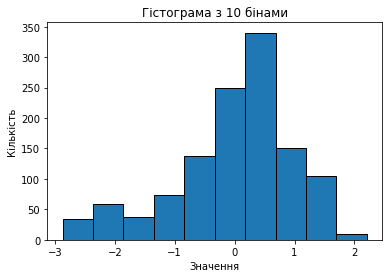

In [40]:
def plot_df_autobins():
    plt.hist(df_stand['actual_productivity'], bins=10, edgecolor='black')
    plt.xlabel('Значення')
    plt.ylabel('Кількість')
    plt.title('Гістограма з 10 бінами')
    plt.show()
plot_df_autobins()

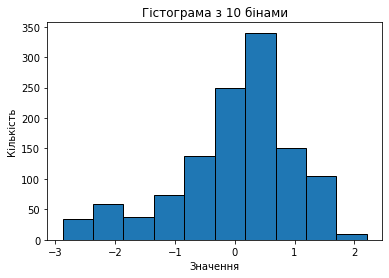

In [41]:
def plot_arr_autobins():  
    plt.hist(arr_stand[:,14], bins=10, edgecolor='black')
    plt.xlabel('Значення')
    plt.ylabel('Кількість')
    plt.title('Гістограма з 10 бінами')
    plt.show()
plot_arr_autobins()

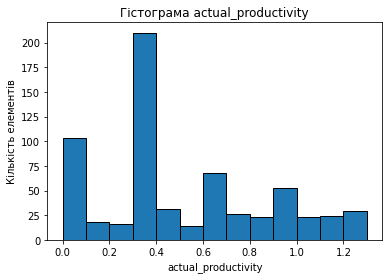

In [42]:
def plot_df_choosebins():
    attribute_to_plot = 'actual_productivity'
    custom_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
    plt.hist(df_stand[attribute_to_plot], bins=custom_bins, edgecolor='k')
    plt.xlabel(attribute_to_plot)
    plt.ylabel('Кількість елементів')
    plt.title(f'Гістограма {attribute_to_plot}')
    plt.show()
plot_df_choosebins()

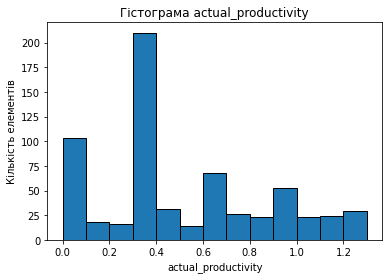

In [43]:
def plot_ar_choosebins():
    attribute_to_plot = 'actual_productivity'
    custom_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
    plt.hist(arr_stand_tuples[attribute_to_plot], bins=custom_bins, edgecolor='k')
    plt.xlabel(attribute_to_plot)
    plt.ylabel('Кількість елементів')
    plt.title(f'Гістограма {attribute_to_plot}')
    plt.show()
plot_ar_choosebins()

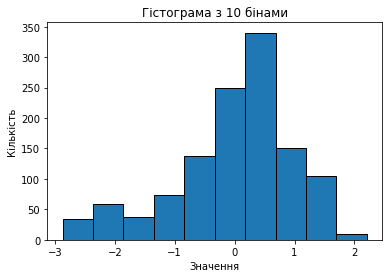

Execution time: 0.149526 seconds


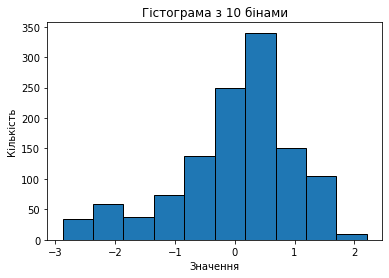

Execution time: 0.133930 seconds


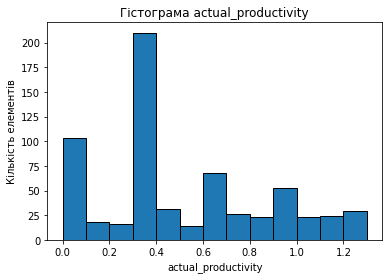

Execution time: 0.165284 seconds


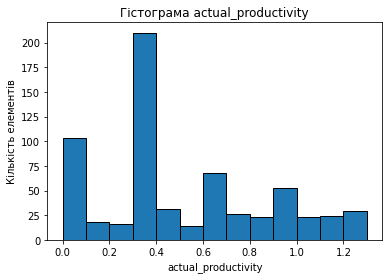

Execution time: 0.150770 seconds


In [44]:
timer(plot_df_autobins)
timer(plot_arr_autobins)
timer(plot_df_choosebins)
timer(plot_ar_choosebins)

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

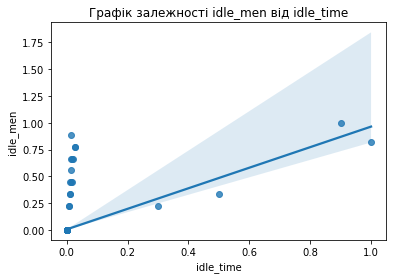

In [45]:
def graph_4_df():
    atr1 = "idle_time"
    atr2 = "idle_men"
    sns.regplot(x = df_normis[atr1], y = df_normis[atr2])
    plt.xlabel(atr1)
    plt.ylabel(atr2)
    plt.title(f'Графік залежності {atr2} від {atr1}')
    plt.show()
graph_4_df()

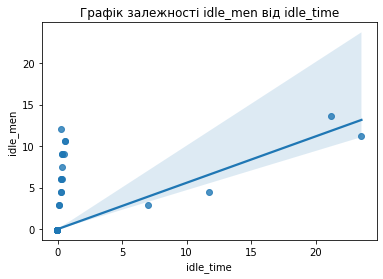

In [46]:
def graph_4_np():
    atr1 = "idle_time"
    atr2 = "idle_men"
    sns.regplot(x = arr_stand_tuples[atr1], y = arr_stand_tuples[atr2])
    plt.xlabel(f'{atr1}')
    plt.ylabel(f'{atr2}')
    plt.title(f'Графік залежності {atr2} від {atr1}')
    plt.show()
graph_4_np()

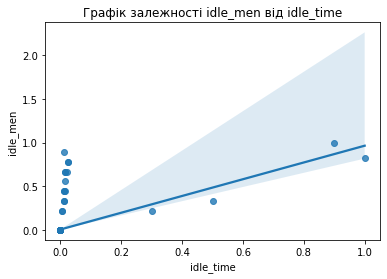

Execution time: 0.272404 seconds


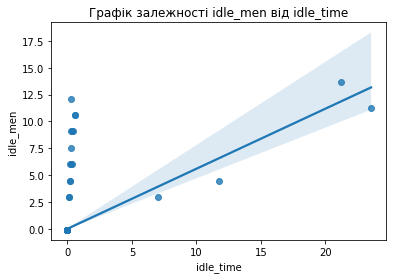

Execution time: 0.311731 seconds


In [87]:
t_4_df = timer(graph_4_df)
t_4_np = timer(graph_4_np)

### 5. Підрахувати коефіцієнт Пірсона та Спірсона(Спірмена???) для двох integer/real атрибутів.

In [47]:
def pearson_df(atr1, atr2):
    x = df_stand[atr1]
    y = df_stand[atr2]
    k, p = scipy.stats.pearsonr(x, y)
    return k, p
def spearman_df(atr1, atr2):
    x = df_stand[atr1]
    y = df_stand[atr2]
    k, p = scipy.stats.spearmanr(x, y)
    return k, p
def pearson_np(atr1, atr2):
    x = arr_stand_tuples[atr1]
    y = arr_stand_tuples[atr2]
    k, p = scipy.stats.pearsonr(x, y)
    return k, p
def spearman_np(atr1, atr2):
    x = arr_stand_tuples[atr1]
    y = arr_stand_tuples[atr2]
    k, p = scipy.stats.spearmanr(x, y)
    return k, p

In [48]:
lst = df.select_dtypes(include=['number']).columns.to_list()
for i in range(len(lst) - 1):
    atr1 = lst[i]
    atr2 = lst[i + 1]
    correlation_coefficient, p_value = pearson_df(atr1, atr2)
    print(f"Кореляція між {atr1} і {atr2}: коефіцієнт = {correlation_coefficient}, p-значення = {p_value}")

Кореляція між targeted_productivity і smv: коефіцієнт = -0.06948887331582093, p-значення = 0.01619241099600951
Кореляція між smv і wip: коефіцієнт = 0.32270386013400576, p-значення = 2.067396397438896e-30
Кореляція між wip і over_time: коефіцієнт = 0.2765285669357056, p-значення = 1.882235660010119e-22
Кореляція між over_time і incentive: коефіцієнт = -0.004793251624663182, p-значення = 0.8684220761515006
Кореляція між incentive і idle_time: коефіцієнт = -0.012023621339270915, p-значення = 0.6777247553528513
Кореляція між idle_time і idle_men: коефіцієнт = 0.5591459152184024, p-значення = 2.1422503153392004e-99
Кореляція між idle_men і actual_productivity: коефіцієнт = -0.18173432643347645, p-значення = 2.391453421378788e-10


In [49]:
for i in range(len(lst) - 1):
    atr1 = lst[i]
    atr2 = lst[i + 1]
    correlation_coefficient, p_value = spearman_df(atr1, atr2)
    print(f"Кореляція між {atr1} і {atr2}: коефіцієнт = {correlation_coefficient}, p-значення = {p_value}")

Кореляція між targeted_productivity і smv: коефіцієнт = -0.0913225016507916, p-значення = 0.0015622886827024167
Кореляція між smv і wip: коефіцієнт = 0.7351683924219647, p-значення = 5.3402153183466015e-204
Кореляція між wip і over_time: коефіцієнт = 0.6608216709540443, p-значення = 4.134243470191946e-151
Кореляція між over_time і incentive: коефіцієнт = 0.5389557411764794, p-значення = 3.842001914505261e-91
Кореляція між incentive і idle_time: коефіцієнт = -0.05379839356496326, p-значення = 0.06278613689669678
Кореляція між idle_time і idle_men: коефіцієнт = 0.9999644946834236, p-значення = 0.0
Кореляція між idle_men і actual_productivity: коефіцієнт = -0.14765806360805458, p-значення = 2.875304976481522e-07


In [50]:
pearson_np('idle_time' , 'idle_men')

(0.5591459152184024, 2.1422503153392004e-99)

In [51]:
spearman_np("idle_time", "idle_men")

(0.9999644946834236, 0.0)

### 6. Провести One Hot Encoding категоріального string атрибуту.

In [52]:
def onehotencoding_df():
    df_encoded = pd.get_dummies(df, columns=['department'], prefix = "department")
    return df_encoded
onehotencoding_df()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing
0,1/1/2015,Quarter1,Thursday,8,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0,59.0,0.940725,0,1
1,1/1/2015,Quarter1,Thursday,1,0.75,3.94,0.0,960.0,0.0,0.0,0.0,0,8.0,0.886500,1,0
2,1/1/2015,Quarter1,Thursday,11,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0,30.5,0.800570,0,1
3,1/1/2015,Quarter1,Thursday,12,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0,30.5,0.800570,0,1
4,1/1/2015,Quarter1,Thursday,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0,56.0,0.800382,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,Wednesday,10,0.75,2.90,0.0,960.0,0.0,0.0,0.0,0,8.0,0.628333,1,0
1193,3/11/2015,Quarter2,Wednesday,8,0.70,3.90,0.0,960.0,0.0,0.0,0.0,0,8.0,0.625625,1,0
1194,3/11/2015,Quarter2,Wednesday,7,0.65,3.90,0.0,960.0,0.0,0.0,0.0,0,8.0,0.625625,1,0
1195,3/11/2015,Quarter2,Wednesday,9,0.75,2.90,0.0,1800.0,0.0,0.0,0.0,0,15.0,0.505889,1,0


In [53]:
def ohe_np():
    ohe = OneHotEncoder()
    xxx = ohe.fit_transform(arr[:,2].reshape(-1,1)).toarray()
    new = np.hstack([arr, xxx])
    arr_without_column = np.delete(new, 2, axis=1)
    return arr_without_column
www = ohe_np()
www

array([['1/1/2015', 'Quarter1', 'Thursday', ..., 0.940725424, 0.0, 1.0],
       ['1/1/2015', 'Quarter1', 'Thursday', ..., 0.8865, 1.0, 0.0],
       ['1/1/2015', 'Quarter1', 'Thursday', ..., 0.800570492, 0.0, 1.0],
       ...,
       ['3/11/2015', 'Quarter2', 'Wednesday', ..., 0.625625, 1.0, 0.0],
       ['3/11/2015', 'Quarter2', 'Wednesday', ..., 0.505888889, 1.0, 0.0],
       ['3/11/2015', 'Quarter2', 'Wednesday', ..., 0.394722222, 1.0, 0.0]],
      dtype=object)

In [54]:
def ohe_np_tuples():
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    departments_encoded = encoder.fit_transform(arr_tuples['department'].reshape(-1, 1))
    arr_encoded = np.array([tuple(row) for row in departments_encoded], list(zip(['sweing', 'finishing'], ['<f8', '<f8'])))

    combined_dtype = arr_tuples.dtype.descr + arr_encoded.dtype.descr

    combined_array = np.empty(arr_tuples.shape[0], dtype=combined_dtype)

    for field_name in arr_tuples.dtype.names:
        combined_array[field_name] = arr_tuples[field_name]
    for field_name in arr_encoded.dtype.names:
        combined_array[field_name] = arr_encoded[field_name]
    arr_without_column = np.lib.recfunctions.drop_fields(combined_array, 'department', asrecarray=True)
    return arr_without_column
qqq = ohe_np_tuples()
qqq


rec.array([('1/1/2015', 'Quarter1', 'Thursday', 8, 0.8 , 26.16, 1108., 7080., 98., 0., 0., 0, 59.0, 0.94072542, 0., 1.),
           ('1/1/2015', 'Quarter1', 'Thursday', 1, 0.75,  3.94,    0.,  960.,  0., 0., 0., 0, 8.0, 0.8865    , 1., 0.),
           ('1/1/2015', 'Quarter1', 'Thursday', 11, 0.8 , 11.41,  968., 3660., 50., 0., 0., 0, 30.5, 0.80057049, 0., 1.),
           ...,
           ('3/11/2015', 'Quarter2', 'Wednesday', 7, 0.65,  3.9 ,    0.,  960.,  0., 0., 0., 0, 8.0, 0.625625  , 1., 0.),
           ('3/11/2015', 'Quarter2', 'Wednesday', 9, 0.75,  2.9 ,    0., 1800.,  0., 0., 0., 0, 15.0, 0.50588889, 1., 0.),
           ('3/11/2015', 'Quarter2', 'Wednesday', 6, 0.7 ,  2.9 ,    0.,  720.,  0., 0., 0., 0, 6.0, 0.39472222, 1., 0.)],
          dtype=[('date', 'O'), ('quarter', 'O'), ('day', 'O'), ('team', 'O'), ('targeted_productivity', '<f8'), ('smv', '<f8'), ('wip', '<f8'), ('over_time', '<f8'), ('incentive', '<f8'), ('idle_time', '<f8'), ('idle_men', '<f8'), ('no_of_style_change'

In [88]:
t_6_df = timer(onehotencoding_df)
t_6_np = timer(ohe_np)
t_6_np_tuples = timer(ohe_np_tuples)

Execution time: 0.004267 seconds
Execution time: 0.002556 seconds
Execution time: 0.009339 seconds


### 7. Провести візуалізацію багатовимірних даних<br>
використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

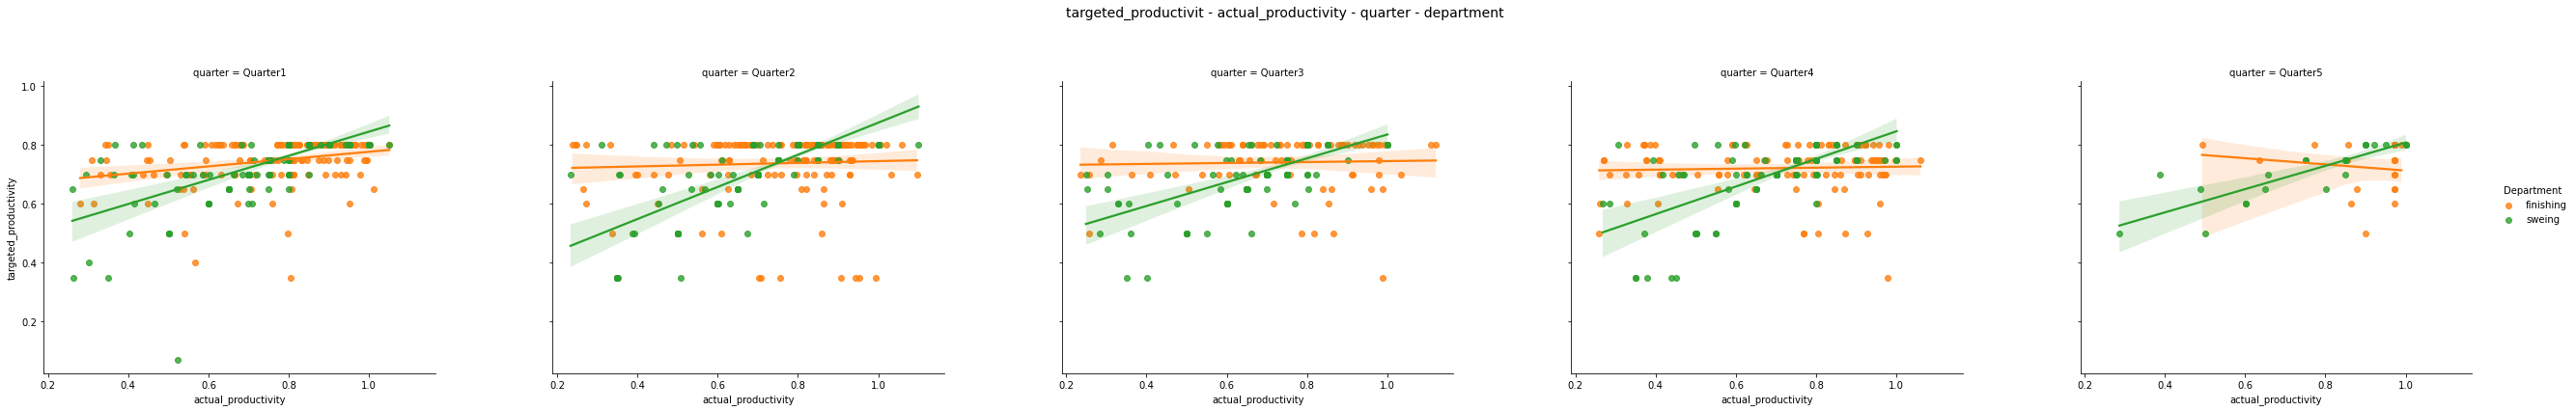

In [55]:
g = sns.FacetGrid(df, hue="department", col='quarter', 
                  hue_order=['finishing', 'sweing'], col_order=['Quarter1', 'Quarter2', 'Quarter3', "Quarter4", "Quarter5"],
                 aspect= 1.2, height=6, palette=sns.color_palette()[1:5])
g.map(sns.regplot, "actual_productivity", "targeted_productivity", )
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('targeted_productivit - actual_productivity - quarter - department', fontsize=14)
l = g.add_legend(title='Department')

In [56]:
def viz_4d_df(): 
    fig = plt.figure(figsize=(14, 16))
    t = fig.suptitle('targeted_productivit - actual_productivity - smv - department', fontsize=14)
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if i == 'finishing' else 'yellow' for i in list(df['department'])]

    finishing_mask = df['department'] == 'finishing'
    sweing_mask = df['department'] == 'sweing'

    ax.scatter(xs=df[finishing_mask]['targeted_productivity'], ys=df[finishing_mask]['actual_productivity'], 
               zs=df[finishing_mask]['smv'], alpha=0.5, c='red', edgecolors='black', s=30, label='finishing')

    ax.scatter(xs=df[sweing_mask]['targeted_productivity'], ys=df[sweing_mask]['actual_productivity'], 
               zs=df[sweing_mask]['smv'], alpha=0.5, c='yellow', edgecolors='black', s=30, label='sweing')
    ax.set_xlabel('targeted_productivity')
    ax.set_ylabel('actual_productivity')
    ax.set_zlabel('smv')
    ax.legend(title='Department')

In [57]:
def viz_4d_np():
    fig = plt.figure(figsize=(14, 16))
    t = fig.suptitle('targeted_productivit - actual_productivity - smv - department', fontsize=14)
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if i == 'finishing' else 'yellow' for i in list(arr_tuples['department'])]

    finishing_mask = arr_tuples['department'] == 'finishing'
    sweing_mask = arr_tuples['department'] == 'sweing'

    ax.scatter(xs=arr_tuples[finishing_mask]['targeted_productivity'], ys=arr_tuples[finishing_mask]['actual_productivity'], 
               zs=arr_tuples[finishing_mask]['smv'], alpha=0.5, c='red', edgecolors='black', s=30, label='finishing')

    ax.scatter(xs=arr_tuples[sweing_mask]['targeted_productivity'], ys=arr_tuples[sweing_mask]['actual_productivity'], 
               zs=arr_tuples[sweing_mask]['smv'], alpha=0.5, c='yellow', edgecolors='black', s=30, label='sweing')
    ax.set_xlabel('targeted_productivity')
    ax.set_ylabel('actual_productivity')
    ax.set_zlabel('smv')
    ax.legend(title='Department')

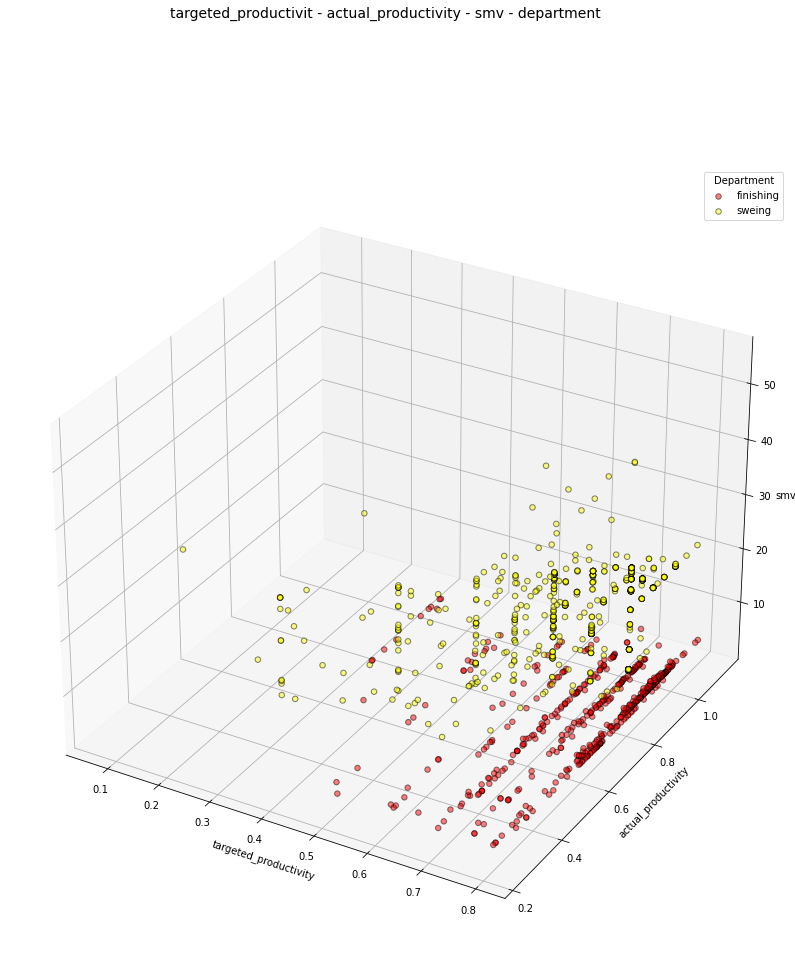

In [58]:
viz_4d_df()

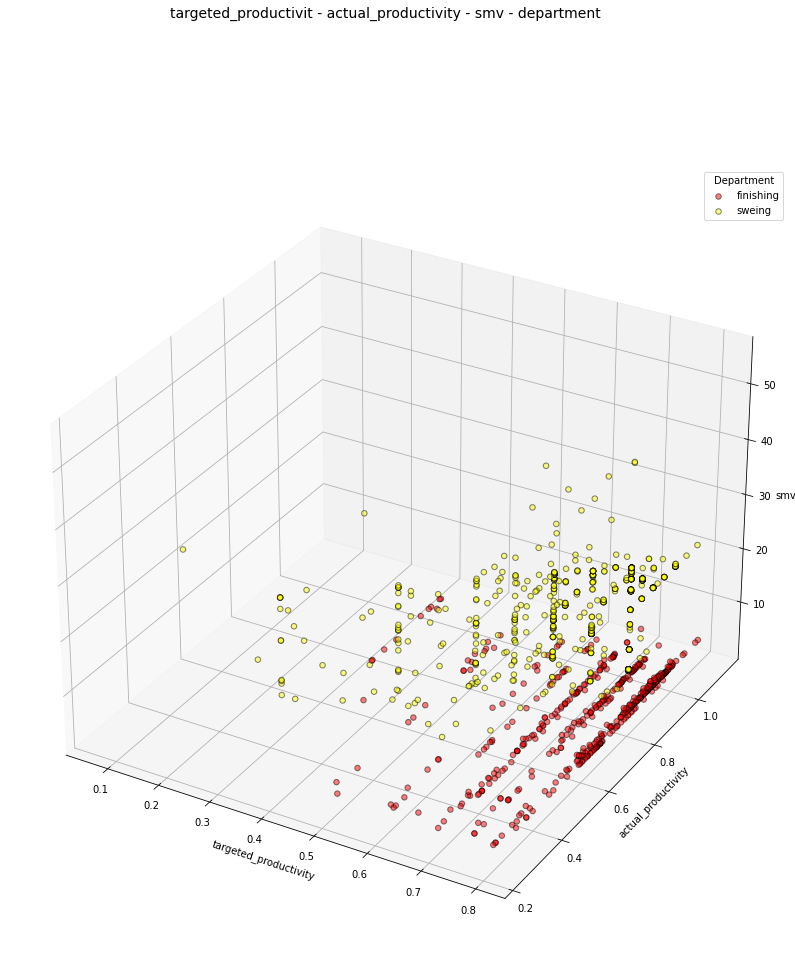

In [59]:
viz_4d_np()

Execution time: 0.032450 seconds
Execution time: 0.020930 seconds


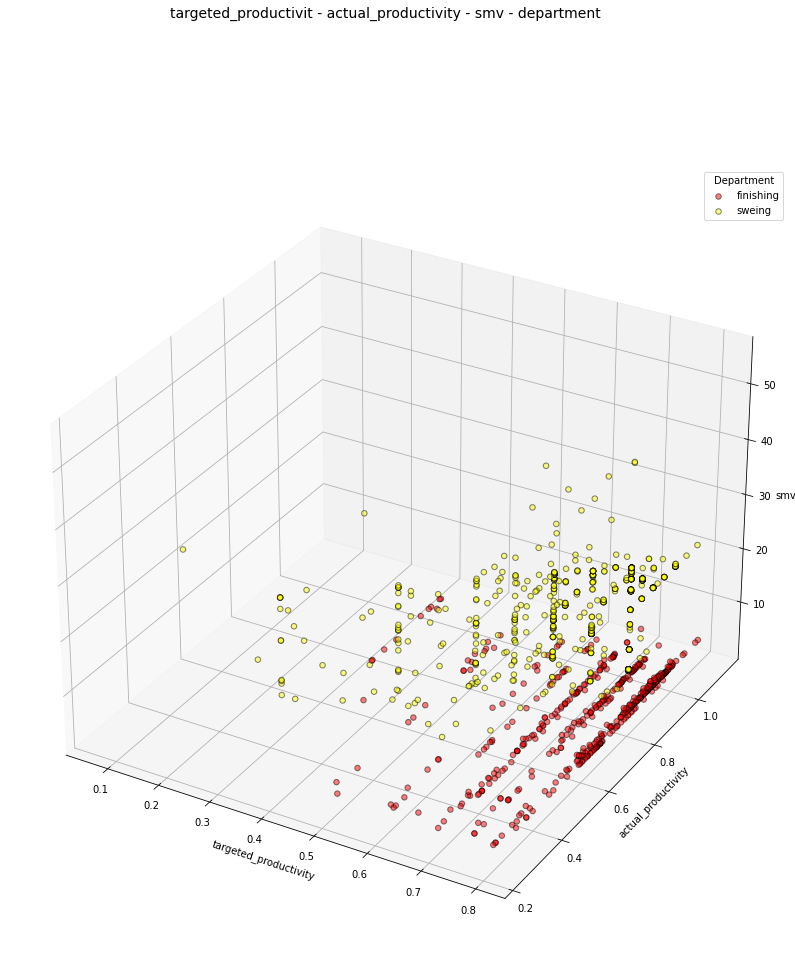

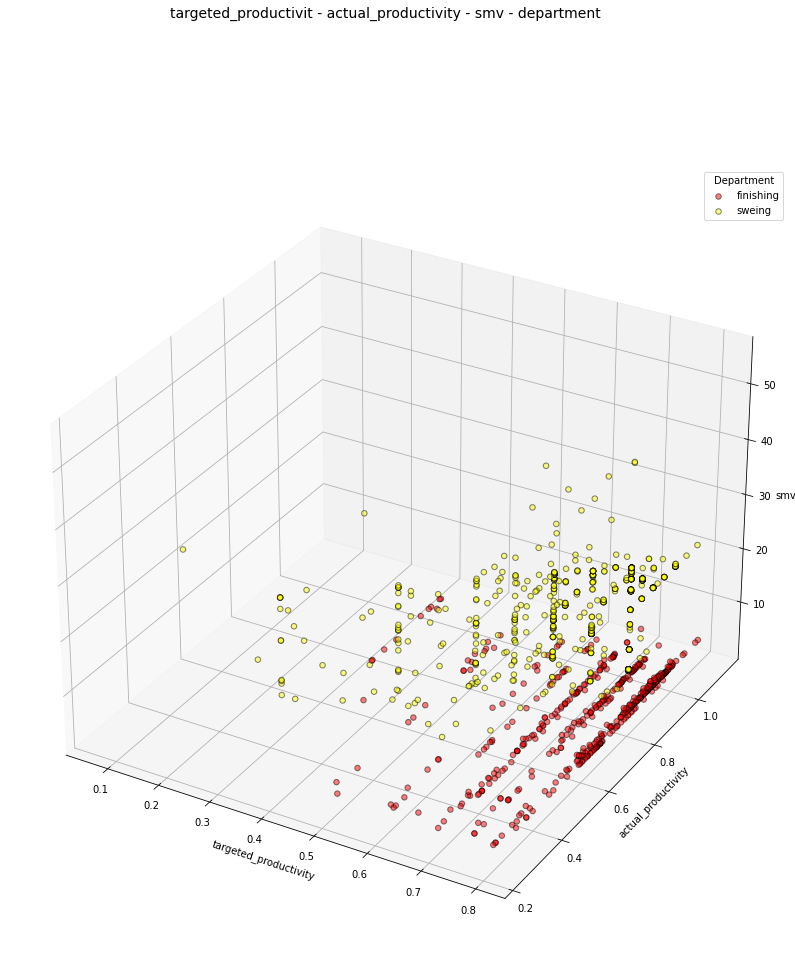

In [60]:
timer(viz_4d_df)
timer(viz_4d_np)

Додаткове завдання:<br>
8. Поділити випадковим чином датасет на дві рівні частини. Навчити 3 регресійні моделі на основі не менше одного атрибуту відновлювати інший. Навчання має відбуватися на основі першого датасету 
(https://scikit-learn.org/stable/modules/linear_model.html), візуалізувати моделі та на основі середньої квадратичної помилки (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) вибрати найкращу.

In [61]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [67]:
data1 = df[['idle_men', 'idle_time']]

X1 = data1['idle_men']
y1 = data1['idle_time']


In [68]:
data2 = df[['smv', 'wip']]

X2 = data2['smv']
y2 = data2['wip']

In [123]:
X2

0       26.16
1        3.94
2       11.41
3       11.41
4       25.90
        ...  
1192     2.90
1193     3.90
1194     3.90
1195     2.90
1196     2.90
Name: smv, Length: 1197, dtype: float64

In [125]:
y2

0       1108.0
1          0.0
2        968.0
3        968.0
4       1170.0
         ...  
1192       0.0
1193       0.0
1194       0.0
1195       0.0
1196       0.0
Name: wip, Length: 1197, dtype: float64

In [69]:
data3 = data2.drop(data2[data2["wip"] > 5000].index)

X3 = data3['smv']
y3 = data3['wip']

In [119]:
# 1. Розділіть набір даних на тренувальний та тестовий
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=42)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [120]:
# 2. Навчання регресійних моделей
# Проста лінійна регресія
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Ridge регресія
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train, y_train)

# Lasso регресія
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

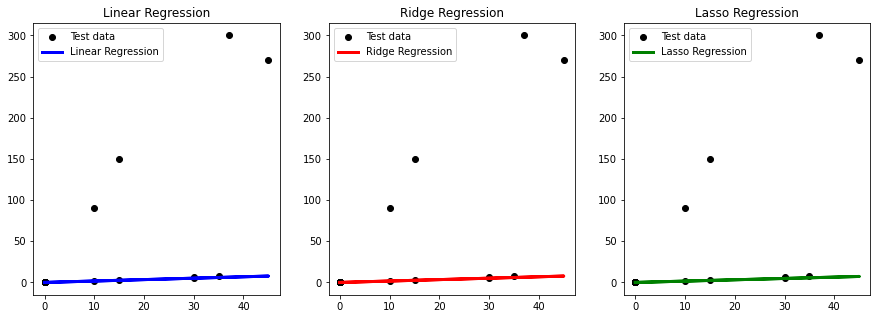

In [121]:
# 3. Візуалізуйте регресійні моделі
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# First subplot - Linear Regression
ax1.scatter(X_test, y_test, color='black', label='Test data')
ax1.plot(X_test, model_linear.predict(X_test), color='blue', linewidth=3, label='Linear Regression')
ax1.set_title('Linear Regression')
ax1.legend() 

# Second subplot - Ridge Regression
ax2.scatter(X_test, y_test, color='black', label='Test data')
ax2.plot(X_test, model_ridge.predict(X_test), color='red', linewidth=3, label='Ridge Regression')
ax2.set_title('Ridge Regression')
ax2.legend()

# Third subplot - Lasso Regression
ax3.scatter(X_test, y_test, color='black', label='Test data')
ax3.plot(X_test, model_lasso.predict(X_test), color='green', linewidth=3, label='Lasso Regression')
ax3.set_title('Lasso Regression')
ax3.legend()

plt.show()

In [122]:
# 4. Підрахуйте Mean Squared Error
mse_linear = mean_squared_error(y_test, model_linear.predict(X_test))
mse_ridge = mean_squared_error(y_test, model_ridge.predict(X_test))
mse_lasso = mean_squared_error(y_test, model_lasso.predict(X_test))

print(f'Mean Squared Error (Linear Regression): {mse_linear}')
print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')
print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')

# Виберіть найкращу модель за значенням Mean Squared Error
best_model = min(mse_linear, mse_ridge, mse_lasso)

# Виведіть інформацію про найкращу модель
if best_model == mse_linear:
    print('Найкраща модель: Проста лінійна регресія')
elif best_model == mse_ridge:
    print('Найкраща модель: Ridge регресія')
else:
    print('Найкраща модель: Lasso регресія')

Mean Squared Error (Linear Regression): 308.0810455797684
Mean Squared Error (Ridge Regression): 308.08231166290625
Mean Squared Error (Lasso Regression): 308.9638134460911
Найкраща модель: Проста лінійна регресія


Підготовка даних

In [175]:
X = np.array(data3['smv']).reshape(-1, 1)
y = np.array(data3['wip'])

In [176]:
y

array([1108.,    0.,  968., ...,    0.,    0.,    0.])

Створення поліноміальних ознак

In [177]:
degree=5
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

Навчання моделі лінійної регресії

In [179]:
reg = LinearRegression()
reg.fit(X_poly, y)

LinearRegression()

Прогнозування та візуалізація результатів

In [180]:
X_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_vals_poly = poly_features.fit_transform(X_vals)
y_vals = reg.predict(X_vals_poly)

In [181]:
y_vals

array([ -31.20931674,  -18.77020764,    2.18676519,   30.63149243,
         65.5885897 ,  106.13618784,  151.40472328,  200.57572826,
        252.88062125,  307.59949718,  364.05991779,  421.63570194,
        479.74571593,  537.8526638 ,  595.46187762,  652.12010788,
        707.41431371,  760.97045326,  812.45227399,  861.56010298,
        908.02963724,  951.63073404,  992.16620121, 1029.47058745,
       1063.40897266, 1093.87575825, 1120.79345742, 1144.11148553,
       1163.80495036, 1179.87344246, 1192.33982545, 1201.24902631,
       1206.66682575, 1208.67864847, 1207.38835349, 1202.91702447,
       1195.40176003, 1184.99446404, 1171.86063594, 1156.17816107,
       1138.13610097, 1117.9334837 , 1095.77809413, 1071.8852643 ,
       1046.47666368, 1019.77908952,  992.02325715,  963.44259029,
        934.27201137,  904.74673186,  875.10104254,  845.56710383,
        816.37373615,  787.74521017,  759.90003713,  733.04975921,
        707.39773977,  683.13795373,  660.45377781,  639.51678

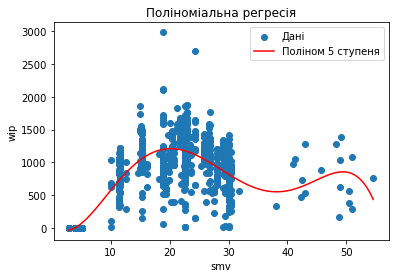

In [182]:
                                          
plt.scatter(X, y, label='Дані')
plt.plot(X_vals, y_vals, label=f'Поліном {degree} ступеня', color='red')
plt.legend()
plt.xlabel('smv')
plt.ylabel('wip')
plt.title('Поліноміальна регресія')
plt.show()